In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/heart_disease_dataset_UCI.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()
target_columns = ['age','trestbps','chol','thalach','oldpeak']
df[target_columns] = standardScalar.fit_transform(df[target_columns])

In [7]:
X= df.drop(['target'], axis=1)
Y= df['target']

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=40)

In [9]:
#check sample sizes
print('X_train: ', X_train.size)
print('X_test: ', X_test.size)
print('Y_train: ', Y_train.size)
print('Y_test: ', Y_test.size)
#note need to convert into numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

X_train:  2951
X_test:  988
Y_train:  227
Y_test:  76


In [10]:
from my_naive_bayes import MyNaiveBayes as MNB 

In [11]:
gaussBayes = MNB()

In [12]:
gaussBayes.fit(X_train, Y_train)

In [15]:
predictionGaussBayes = gaussBayes.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cmGaussBayes = confusion_matrix(Y_test, predictionGaussBayes)

In [18]:
cmGaussBayes

array([[32,  2],
       [ 8, 34]])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(Y_test, predictionGaussBayes)

0.868421052631579

In [22]:
from sklearn.metrics import precision_score

In [23]:
precision_score(Y_test, predictionGaussBayes)

0.9444444444444444

In [24]:
from sklearn.metrics import recall_score

In [25]:
recall_score(Y_test, predictionGaussBayes)

0.8095238095238095

In [26]:
tn, fp, fn, tp = cmGaussBayes.ravel()

In [27]:
sensitivity = tp/(tp+fn)

In [28]:
sensitivity

0.8095238095238095

In [29]:
specificity = tn/(fp+tn)

In [30]:
specificity

0.9411764705882353

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
cDisp = ConfusionMatrixDisplay(confusion_matrix=cmGaussBayes)

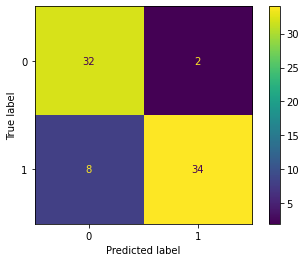

In [33]:
cDisp.plot()